# Assignment 3

Use the 2016 US presidential polls data in polls2016.txt to answer the following questions.  
**(a)** Use the model in polls20161.bug:  
(i)Create an initialization list (in R) supporting 4 chains, with a different initialization for each chain.Set initial values for mu to ±100 and values for tau to 100 or 0.01. Then use jags.model to create the JAGS model R object with these initializations.

In [3]:
# read data
d <- read.table("polls2016.txt", header=TRUE)
d$sigma <- d$ME/2  # standard dev = half margin of error

In [5]:
library(rjags)

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


In [6]:
#initial values for mu and tau
initial.vals <- list(list(mu=100, tau=100),
                      list(mu=100,  tau=0.01),
                      list(mu=-100, tau=100),
                      list(mu=-100,  tau=0.01))

In [9]:
# polls20161.bug
"
model {

  for (j in 1:length(y)) {
    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)
    theta[j] ~ dnorm(mu, 1/tau^2)
  }

  mu ~ dunif(-1000,1000)
  tau ~ dunif(0,1000)

}
"

[1] "\nmodel {\n\n  for (j in 1:length(y)) {\n    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)\n    theta[j] ~ dnorm(mu, 1/tau^2)\n  }\n\n  mu ~ dunif(-1000,1000)\n  tau ~ dunif(0,1000)\n\n}\n"

In [34]:
m1 <- jags.model("polls20161.bug", d, initial.vals, n.chains=4)

Warning message in jags.model("polls20161.bug", d, initial.vals, n.chains = 4):
“Unused variable "poll" in data”Warning message in jags.model("polls20161.bug", d, initial.vals, n.chains = 4):
“Unused variable "ME" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 9
   Total graph size: 42

Initializing model



(ii)Perform a burn-in of 2500 iterations, then monitor the mu and tau nodes for 5000 iterations (for each chain). 
(iii)For the iterations you monitored, produce trace plots of mu and tau. Based on the plots show below, the model reached convergence.

In [35]:
update(m1, 2500)  # burn-in

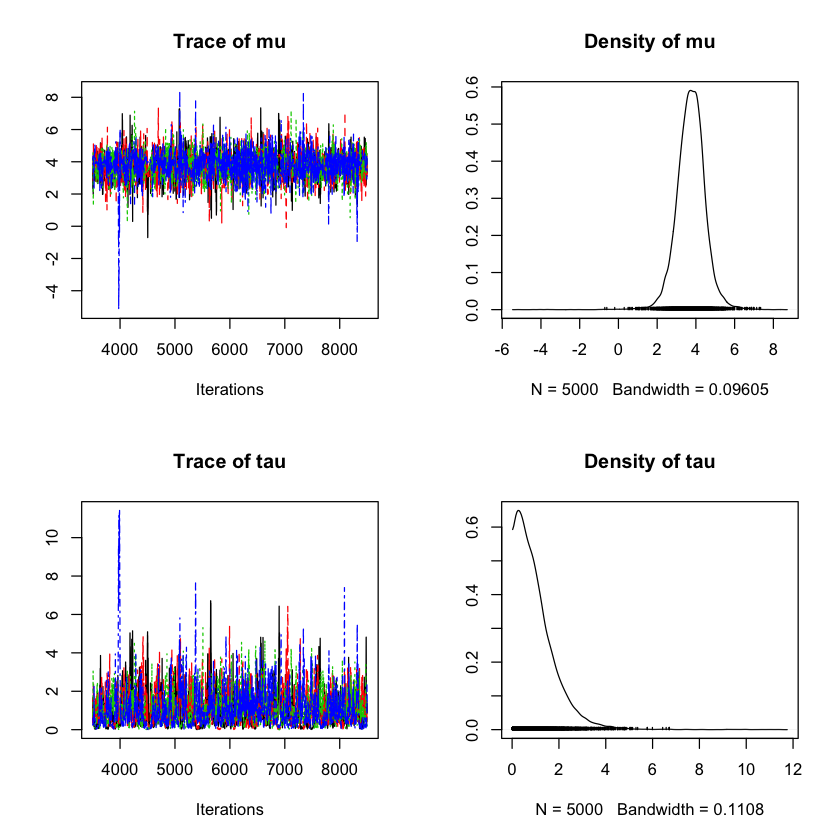

In [36]:
x1 <- coda.samples(m1, c("mu","tau"), n.iter=5000)
plot(x1, smooth=FALSE)

(iv)For the iterations you monitored, compute Gelman-Rubin statistics (potential scale reduction factors) for mu and tau. Based on the result below, Gelman-Rubin statistics appear legitimately near 1 (not just there by chance).

Potential scale reduction factors:

    Point est. Upper C.I.
mu        1.00       1.01
tau       1.02       1.02

Multivariate psrf

1

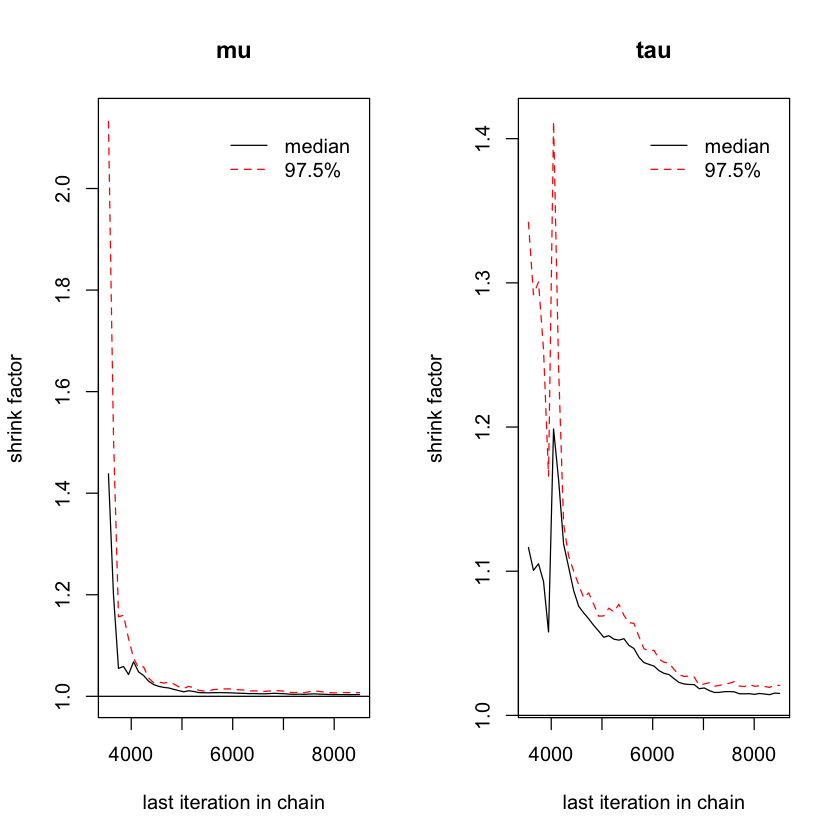

In [37]:
gelman.diag(x1, autoburnin=FALSE)
gelman.plot(x1, autoburnin=FALSE)

(v)For the iterations you monitored, display autocorrelation plots for mu and tau for one of the chains.  
The plots show that both mu and tau have some high autocorrelations and didn't reach 0 around lag 30, but appear legitimately near 0, although the mixing is slow.

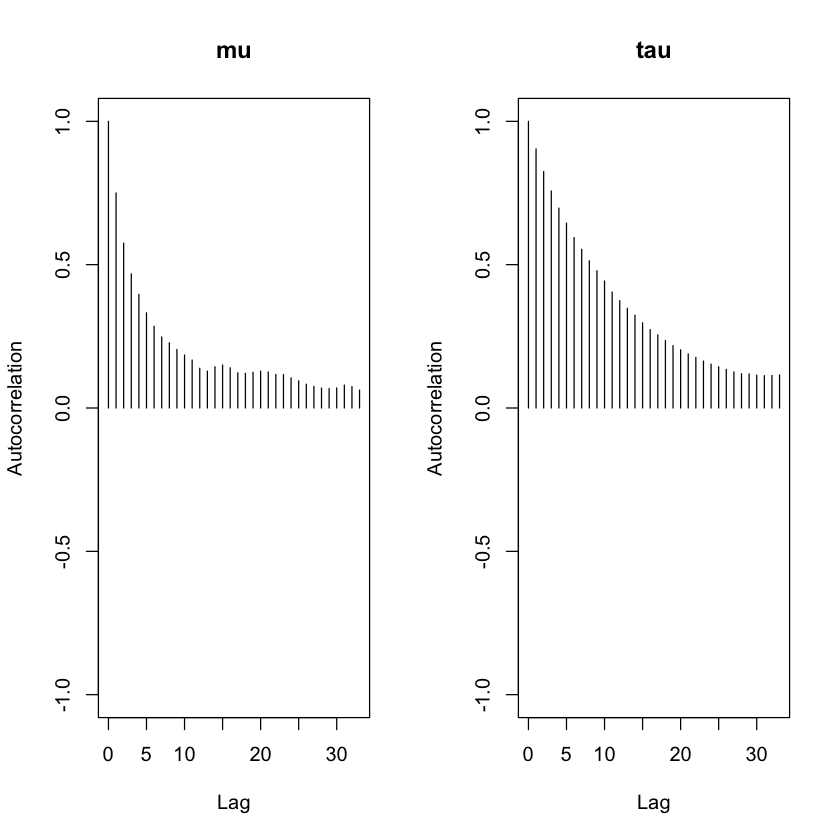

In [38]:
#Check autocorrelation plot for the first chain:
autocorr.plot(x1[[1]])

(vi)For the iterations you monitored, compute effective sample sizes (over all chains) for mu and tau. Both of them can be considered adequate as both exceed the suggested minimum value of 400.

In [39]:
#Check effective sample sizes (summed over all chains):
effectiveSize(x1)

mu       tau 
1733.1140  986.9931

**(b)** Now consider a new model that uses an almost flat prior for tau on the log scale. create a new parameter logtau with a U(−100, 100) distribution, and define tau to be exp(logtau).  
(i)new JAGS model:

In [16]:
# new model
# polls20161_new.bug
"
model {

  for (j in 1:length(y)) {
    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)
    theta[j] ~ dnorm(mu, 1/tau^2)
  }

  mu ~ dunif(-1000,1000)
  logtau ~ dunif(−100, 100)
  tau <- exp(logtau)

}
"

[1] "\nmodel {\n\n  for (j in 1:length(y)) {\n    y[j] ~ dnorm(theta[j], 1/sigma[j]^2)\n    theta[j] ~ dnorm(mu, 1/tau^2)\n  }\n\n  mu ~ dunif(-1000,1000)\n  logtau ~ dunif(−100, 100)\n  tau <- exp(logtau)\n\n}\n"

(ii)Create an initialization list (in R) supporting 4 chains, with a different initialization for each chain. Set initial values for mu to ±100 and values for logtau to log 100 or log 0.01. Then use jags.model to create the JAGS model R object with these initializations.

In [29]:
#initial values for mu and tau
new.initial.vals <- list(list(mu=100, logtau=log(100)),
                      list(mu=100,  logtau=log(0.01)),
                      list(mu=-100, logtau=log(100)),
                      list(mu=-100,  logtau=log(0.01)))

In [30]:
m2 <- jags.model("polls20161_new.bug", d, new.initial.vals, n.chains=4)

Warning message in jags.model("polls20161_new.bug", d, new.initial.vals, n.chains = 4):
“Unused variable "poll" in data”Warning message in jags.model("polls20161_new.bug", d, new.initial.vals, n.chains = 4):
“Unused variable "ME" in data”

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 7
   Unobserved stochastic nodes: 9
   Total graph size: 44

Initializing model



(iii)Perform a burn-in of 2500 iterations, then monitor the mu and tau nodes for 5000 iterations (for each chain).  
(iv)For the iterations you monitored, produce trace plots of mu and tau. The trace of tau indicates that this model did not achieve convergence.

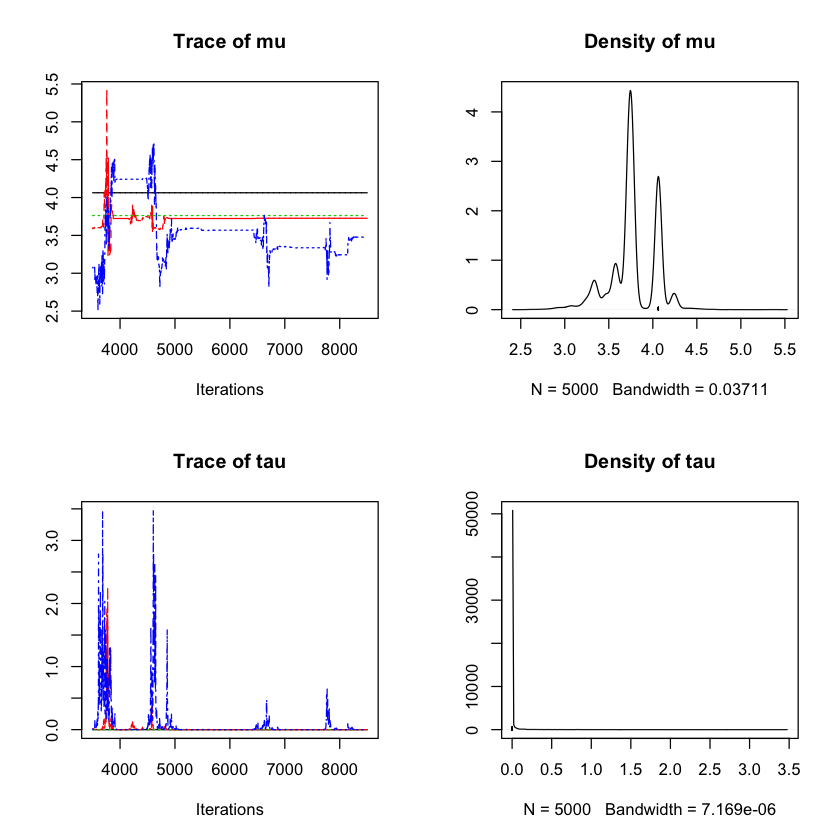

In [31]:
update(m2, 2500)  # burn-in
x2 <- coda.samples(m2, c("mu","tau"), n.iter=5000)
plot(x2, smooth=FALSE)

(v)For the iterations you monitored, compute Gelman-Rubin statistics (potential scale reduction factors) for mu and tau. mu and tau for this model did not show convergence even at end of iterations.

Potential scale reduction factors:

    Point est. Upper C.I.
mu        1.88       7.52
tau       1.28       1.92

Multivariate psrf

1.76

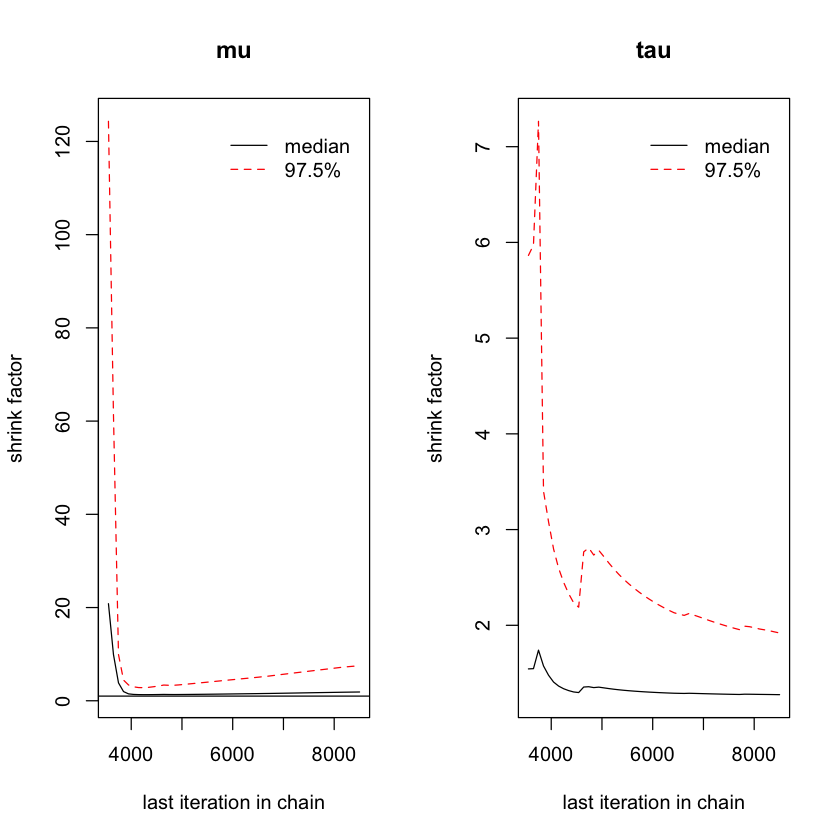

In [33]:
gelman.diag(x2, autoburnin=FALSE)
gelman.plot(x2, autoburnin=FALSE)

(vi)For the iterations you monitored, display autocorrelation plots for mu and tau for one of the chains. The plots show that both mu and tau have every high autocorrelations, and very slow mixing, none of them reached 0 at lag 30.

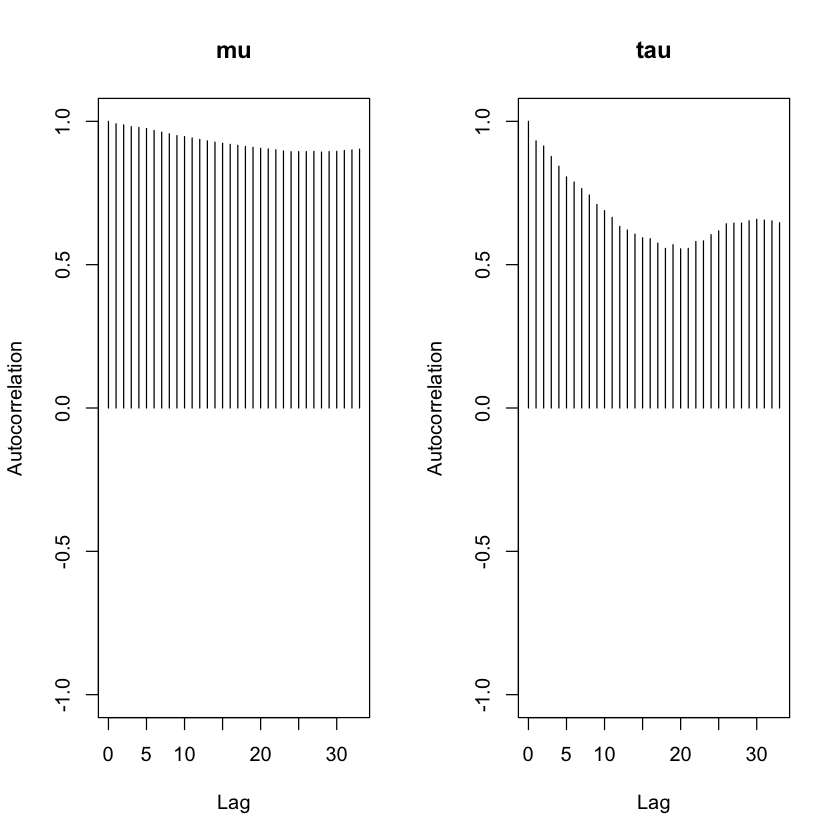

In [32]:
#Check autocorrelation plot for the first chain:
autocorr.plot(x2[[1]])

(vii)Suggest an explanation for the presence of any problems you noted.  
Because hyperprior tau was chosen close to flat, but using actual flat hyperpriors would give an improper posterior. Change prior is necessary for this model to work.